=== Frequency Count ===
Category
Fail          3
Borderline    2
Pass          5
Name: count, dtype: int64

=== Percentage Distribution ===
Category
Fail          30.0
Borderline    20.0
Pass          50.0
Name: proportion, dtype: float64

=== Data Info ===
category

=== Statistics ===
Mean: 54.10
Median: 51.50
Standard Deviation: 18.43
Number of students at risk: 5

Enter fail threshold: 30
Enter pass threshold: 35


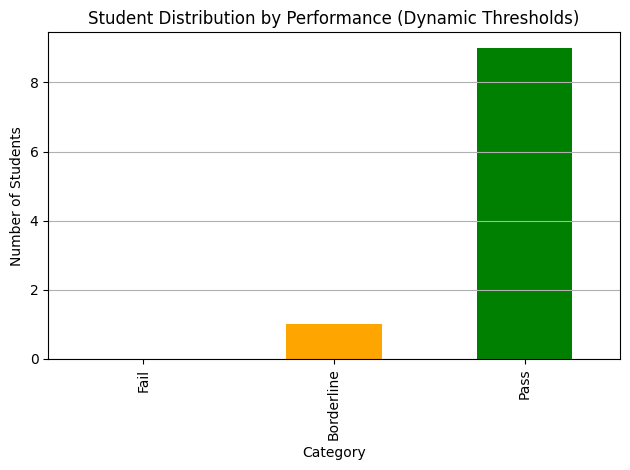

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Data Preparation
# -----------------------------
# Sample marks for 10 students
student_marks = [35, 42, 67, 90, 55, 38, 48, 62, 71, 33]

# Default thresholds
default_fail_threshold = 40
default_pass_threshold = 50

# Function to classify marks
def classify_score(score, fail=default_fail_threshold, pass_mark=default_pass_threshold):
    if score < fail:
        return "Fail"
    elif fail <= score < pass_mark:
        return "Borderline"
    else:
        return "Pass"

# Apply classification
categories = [classify_score(mark) for mark in student_marks]

# Create pandas DataFrame
df = pd.DataFrame({
    "Marks": student_marks,
    "Category": pd.Categorical(categories, categories=["Fail", "Borderline", "Pass"], ordered=True)
})

# -----------------------------
# 2. Data Exploration
# -----------------------------
print("=== Frequency Count ===")
print(df["Category"].value_counts().sort_index())
print("\n=== Percentage Distribution ===")
print(df["Category"].value_counts(normalize=True).sort_index() * 100)

print("\n=== Data Info ===")
print(df["Category"].dtype)

# -----------------------------
# 3. Statistical Insight
# -----------------------------
mean_score = df["Marks"].mean()
median_score = df["Marks"].median()
std_deviation = df["Marks"].std()
at_risk_students = df[df["Category"].isin(["Fail", "Borderline"])].shape[0]

print("\n=== Statistics ===")
print(f"Mean: {mean_score:.2f}")
print(f"Median: {median_score:.2f}")
print(f"Standard Deviation: {std_deviation:.2f}")
print(f"Number of students at risk: {at_risk_students}")

# -----------------------------
# 4. Dynamic Threshold + Visualization
# -----------------------------
def dynamic_classification(marks, fail_threshold, pass_threshold):
    def classify(score):
        if score < fail_threshold:
            return "Fail"
        elif fail_threshold <= score < pass_threshold:
            return "Borderline"
        else:
            return "Pass"

    updated_categories = [classify(score) for score in marks]
    return pd.Categorical(updated_categories, categories=["Fail", "Borderline", "Pass"], ordered=True)

# Example: user-defined thresholds
user_fail = int(float(input("\nEnter fail threshold: ")))         # e.g., 45
user_pass = int(float(input("Enter pass threshold: ")))           # e.g., 60

# Update category with new thresholds
df["Updated_Category"] = dynamic_classification(df["Marks"], user_fail, user_pass)

# Plotting
category_counts = df["Updated_Category"].value_counts().sort_index()
category_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title("Student Distribution by Performance (Dynamic Thresholds)")
plt.xlabel("Category")
plt.ylabel("Number of Students")
plt.grid(axis='y')
plt.tight_layout()
plt.show()